In [1]:
#If you run this yourself, make sure all libraries are installed and the csv file is in the same folder as the notebook
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
mlp.rcParams['figure.dpi'] = 300
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
#import human graded data as pandas df
HG_EM = pd.read_csv("EM.csv") 
HG_QM = pd.read_csv("QM.csv") 
HG_CM = pd.read_csv("CM.csv") 
#import no markscheme data as pandas df
GPT_NMS_EM = pd.read_csv("GPT_EM_NMS.csv") 
GPT_NMS_QM = pd.read_csv("GPT_QM_NMS.csv")
GPT_NMS_CM = pd.read_csv("GPT_CM_NMS.csv")
#import markscheme data as pandas df
GPT_MS_EM = pd.read_csv("GPT_EM_MS.csv") 
GPT_MS_QM = pd.read_csv("GPT_QM_MS.csv")
GPT_MS_CM = pd.read_csv("GPT_CM_MS.csv")
#import no markscheme data as pandas df
Gemini_NMS_EM = pd.read_csv("Gemini_EM_NMS.csv") 
Gemini_NMS_QM = pd.read_csv("Gemini_QM_NMS.csv")
Gemini_NMS_CM = pd.read_csv("Gemini_CM_NMS.csv")
#import markscheme data as pandas df
Gemini_MS_EM = pd.read_csv("Gemini_EM_MS.csv") 
Gemini_MS_QM = pd.read_csv("Gemini_QM_MS.csv")
Gemini_MS_CM = pd.read_csv("Gemini_CM_MS.csv")
#import no markscheme data as pandas df
Claude_NMS_EM = pd.read_csv("Claude_EM_NMS.csv") 
Claude_NMS_QM = pd.read_csv("Claude_QM_NMS.csv")
Claude_NMS_CM = pd.read_csv("Claude_CM_NMS.csv")
#import markscheme data as pandas df
Claude_MS_EM = pd.read_csv("Claude_EM_MS.csv") 
Claude_MS_QM = pd.read_csv("Claude_QM_MS.csv")
Claude_MS_CM = pd.read_csv("Claude_CM_MS.csv")

In [3]:
from data_preprocess import process
HG = process(HG_EM, HG_CM, HG_QM)
HG_EM = HG[0]
HG_CM = HG[1]
HG_QM = HG[2]
concat_HG = pd.concat(HG, ignore_index=True, axis=0)

In [4]:
from data_preprocess import que_process
GPT_SG = que_process(GPT_NMS_EM, GPT_NMS_CM, GPT_NMS_QM, GPT_MS_EM, GPT_MS_CM, GPT_MS_QM)
Gemini_SG = que_process(Gemini_NMS_EM, Gemini_NMS_CM, Gemini_NMS_QM, Gemini_MS_EM, Gemini_MS_CM, Gemini_MS_QM)
Claude_SG = que_process(Claude_NMS_EM, Claude_NMS_CM, Claude_NMS_QM, Claude_MS_EM, Claude_MS_CM, Claude_MS_QM)

In [5]:
#Assigning names
GPT_NMS_EM = GPT_SG[0]
GPT_NMS_CM = GPT_SG[1]
GPT_NMS_QM = GPT_SG[2]
GPT_MS_EM = GPT_SG[3]
GPT_MS_CM = GPT_SG[4]
GPT_MS_QM = GPT_SG[5] 
Gemini_NMS_EM = Gemini_SG[0]
Gemini_NMS_CM = Gemini_SG[1]
Gemini_NMS_QM = Gemini_SG[2]
Gemini_MS_EM = Gemini_SG[3]
Gemini_MS_CM = Gemini_SG[4]
Gemini_MS_QM = Gemini_SG[5]
Claude_NMS_EM = Claude_SG[0]
Claude_NMS_CM = Claude_SG[1]
Claude_NMS_QM = Claude_SG[2]
Claude_MS_EM = Claude_SG[3]
Claude_MS_CM = Claude_SG[4]
Claude_MS_QM = Claude_SG[5] 

In [6]:
GPT_MS = [GPT_MS_EM, GPT_MS_CM, GPT_MS_QM]
GPT_NMS = [GPT_NMS_EM, GPT_NMS_CM, GPT_NMS_QM]
Gemini_MS = [Gemini_MS_EM, Gemini_MS_CM, Gemini_MS_QM]
Gemini_NMS = [Gemini_NMS_EM, Gemini_NMS_CM, Gemini_NMS_QM]
Claude_MS = [Claude_MS_EM, Claude_MS_CM, Claude_MS_QM]
Claude_NMS = [Claude_NMS_EM, Claude_NMS_CM, Claude_NMS_QM]

In [7]:
concat_GPT_MS = pd.concat(GPT_MS, ignore_index=True, axis=0)
concat_GPT_NMS = pd.concat(GPT_NMS, ignore_index=True, axis=0)
concat_Gemini_MS = pd.concat(Gemini_MS, ignore_index=True, axis=0)
concat_Gemini_NMS = pd.concat(Gemini_NMS, ignore_index=True, axis=0)
concat_Claude_MS = pd.concat(Claude_MS, ignore_index=True, axis=0)
concat_Claude_NMS = pd.concat(Claude_NMS, ignore_index=True, axis=0)

In [8]:
# Creating data with only normalized grades using GPT
GPT_red_data = pd.concat([concat_GPT_MS, concat_GPT_NMS, concat_HG], axis=1)
GPT_red_data = GPT_red_data.loc[:, ['Norm', 'Norm Std']]
GPT_red_data.columns = ['Norm_MS', 'Norm_NMS', 'Norm_HG', 'Norm_Std_MS', 'Norm_Std_NMS', 'Std_HG']
GPT_red_data['Human_diff'] = ((GPT_red_data['Norm_MS'] + GPT_red_data['Norm_NMS']) / 2) - GPT_red_data['Norm_HG']
# Creating data with only normalized grades using Gemini
Gemini_red_data = pd.concat([concat_Gemini_MS, concat_Gemini_NMS, concat_HG], axis=1)
Gemini_red_data = Gemini_red_data.loc[:, ['Norm', 'Norm Std']]
Gemini_red_data.columns = ['Norm_MS', 'Norm_NMS', 'Norm_HG', 'Norm_Std_MS', 'Norm_Std_NMS', 'Std_HG']
Gemini_red_data['Human_diff'] = ((Gemini_red_data['Norm_MS'] + Gemini_red_data['Norm_NMS']) / 2) - Gemini_red_data['Norm_HG']
# Creating data with only normalized grades using Claude
Claude_red_data = pd.concat([concat_Claude_MS, concat_Claude_NMS, concat_HG], axis=1)
Claude_red_data = Claude_red_data.loc[:, ['Norm', 'Norm Std']]
Claude_red_data.columns = ['Norm_MS', 'Norm_NMS', 'Norm_HG', 'Norm_Std_MS', 'Norm_Std_NMS', 'Std_HG']
Claude_red_data['Human_diff'] = ((Claude_red_data['Norm_MS'] + Claude_red_data['Norm_NMS']) / 2) - Claude_red_data['Norm_HG']

In [9]:
Gemini_red_data

,Norm_MS,Norm_NMS,Norm_HG,Norm_Std_MS,Norm_Std_NMS,Std_HG,Human_diff
0,0.925000,1.000000,0.812500,0.030619,0.000000,0.062500,0.150000
1,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.200000
2,0.828571,0.900000,0.392857,0.048445,0.017496,0.035714,0.471429
3,0.909091,0.800000,0.863636,0.028748,0.044536,0.045455,-0.009091
4,0.163636,0.654545,0.090909,0.088140,0.044536,0.000000,0.318182
...,...,...,...,...,...,...,...
85,0.905882,0.976471,0.500000,0.068599,0.014409,0.029412,0.441176
86,1.000000,1.000000,0.875000,0.000000,0.000000,0.125000,0.125000
87,0.977778,1.000000,0.944444,0.022222,0.000000,0.055556,0.044444
88,1.000000,1.000000,0.705882,0.000000,0.000000,0.000000,0.294118


In [10]:
combined_red_data = pd.concat([GPT_red_data, Gemini_red_data, Claude_red_data], axis=0)
combined_red_data = combined_red_data.reset_index(drop=True)
combined_red_data

,Norm_MS,Norm_NMS,Norm_HG,Norm_Std_MS,Norm_Std_NMS,Std_HG,Human_diff
0,0.825000,1.000000,0.812500,0.050000,0.000000,0.062500,0.100000
1,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.200000
2,0.385714,0.714286,0.392857,0.092029,0.022588,0.035714,0.157143
3,0.945455,0.909091,0.863636,0.022268,0.028748,0.045455,0.063636
4,0.072727,0.418182,0.090909,0.072727,0.036364,0.000000,0.154545
...,...,...,...,...,...,...,...
265,0.847059,0.823529,0.500000,0.014409,0.000000,0.029412,0.335294
266,0.975000,0.875000,0.875000,0.025000,0.000000,0.125000,0.050000
267,1.000000,1.000000,0.944444,0.000000,0.000000,0.055556,0.055556
268,0.941176,0.917647,0.705882,0.000000,0.014409,0.000000,0.223529


In [11]:
#running t-SNE
tsne = TSNE(learning_rate = 500, n_components = 2)
x_tsne = tsne.fit_transform(combined_red_data)
y = np.concatenate(np.stack((np.repeat(1,30), np.repeat(2,30), np.repeat(3,30),np.repeat(1,30), np.repeat(2,30), np.repeat(3,30), np.repeat(1,30), np.repeat(2,30), np.repeat(3,30)), axis = 0)) #creating a subject marker
z = np.concatenate(np.stack((np.repeat(1, 90), np.repeat(2, 90), np.repeat(3, 90)), axis = 0)) #creating a LLM marker
pd.DataFrame(x_tsne)

,0,1
0,6.063432,-1.979713
1,-0.000236,-0.812915
2,-15.514878,9.314832
3,5.101973,-7.275219
4,-18.272404,11.610399
...,...,...
265,-7.998129,7.962728
266,7.656226,-8.686185
267,5.146803,-12.592440
268,-2.135234,0.923038


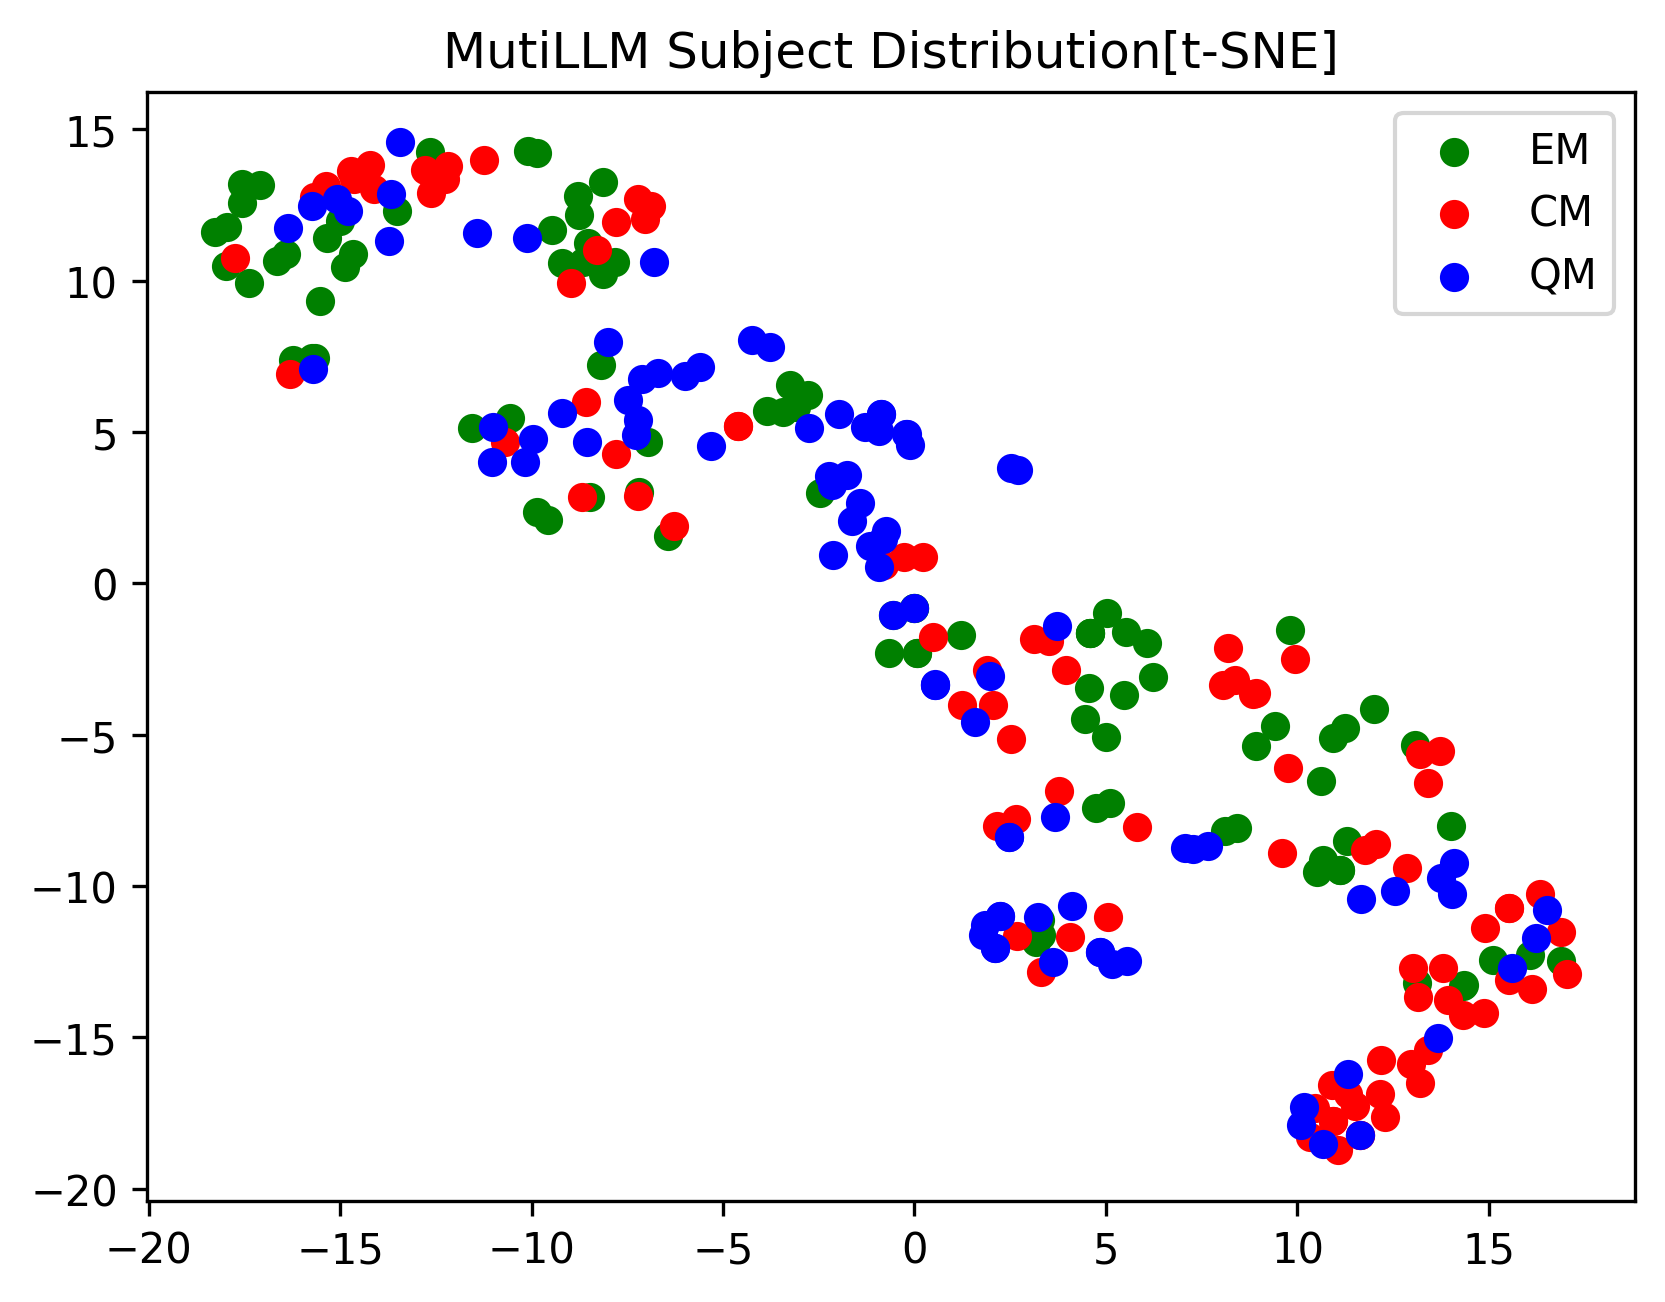

In [27]:
plt.figure()
plt.scatter(x_tsne[np.where(y==1),0], x_tsne[np.where(y==1), 1], color='g', label = "EM")
plt.scatter(x_tsne[np.where(y==2),0], x_tsne[np.where(y==2), 1], color='r', label = "CM")
plt.scatter(x_tsne[np.where(y==3),0], x_tsne[np.where(y==3), 1], color='b', label = "QM")
plt.title('MutiLLM Subject Distribution[t-SNE]')
plt.legend()

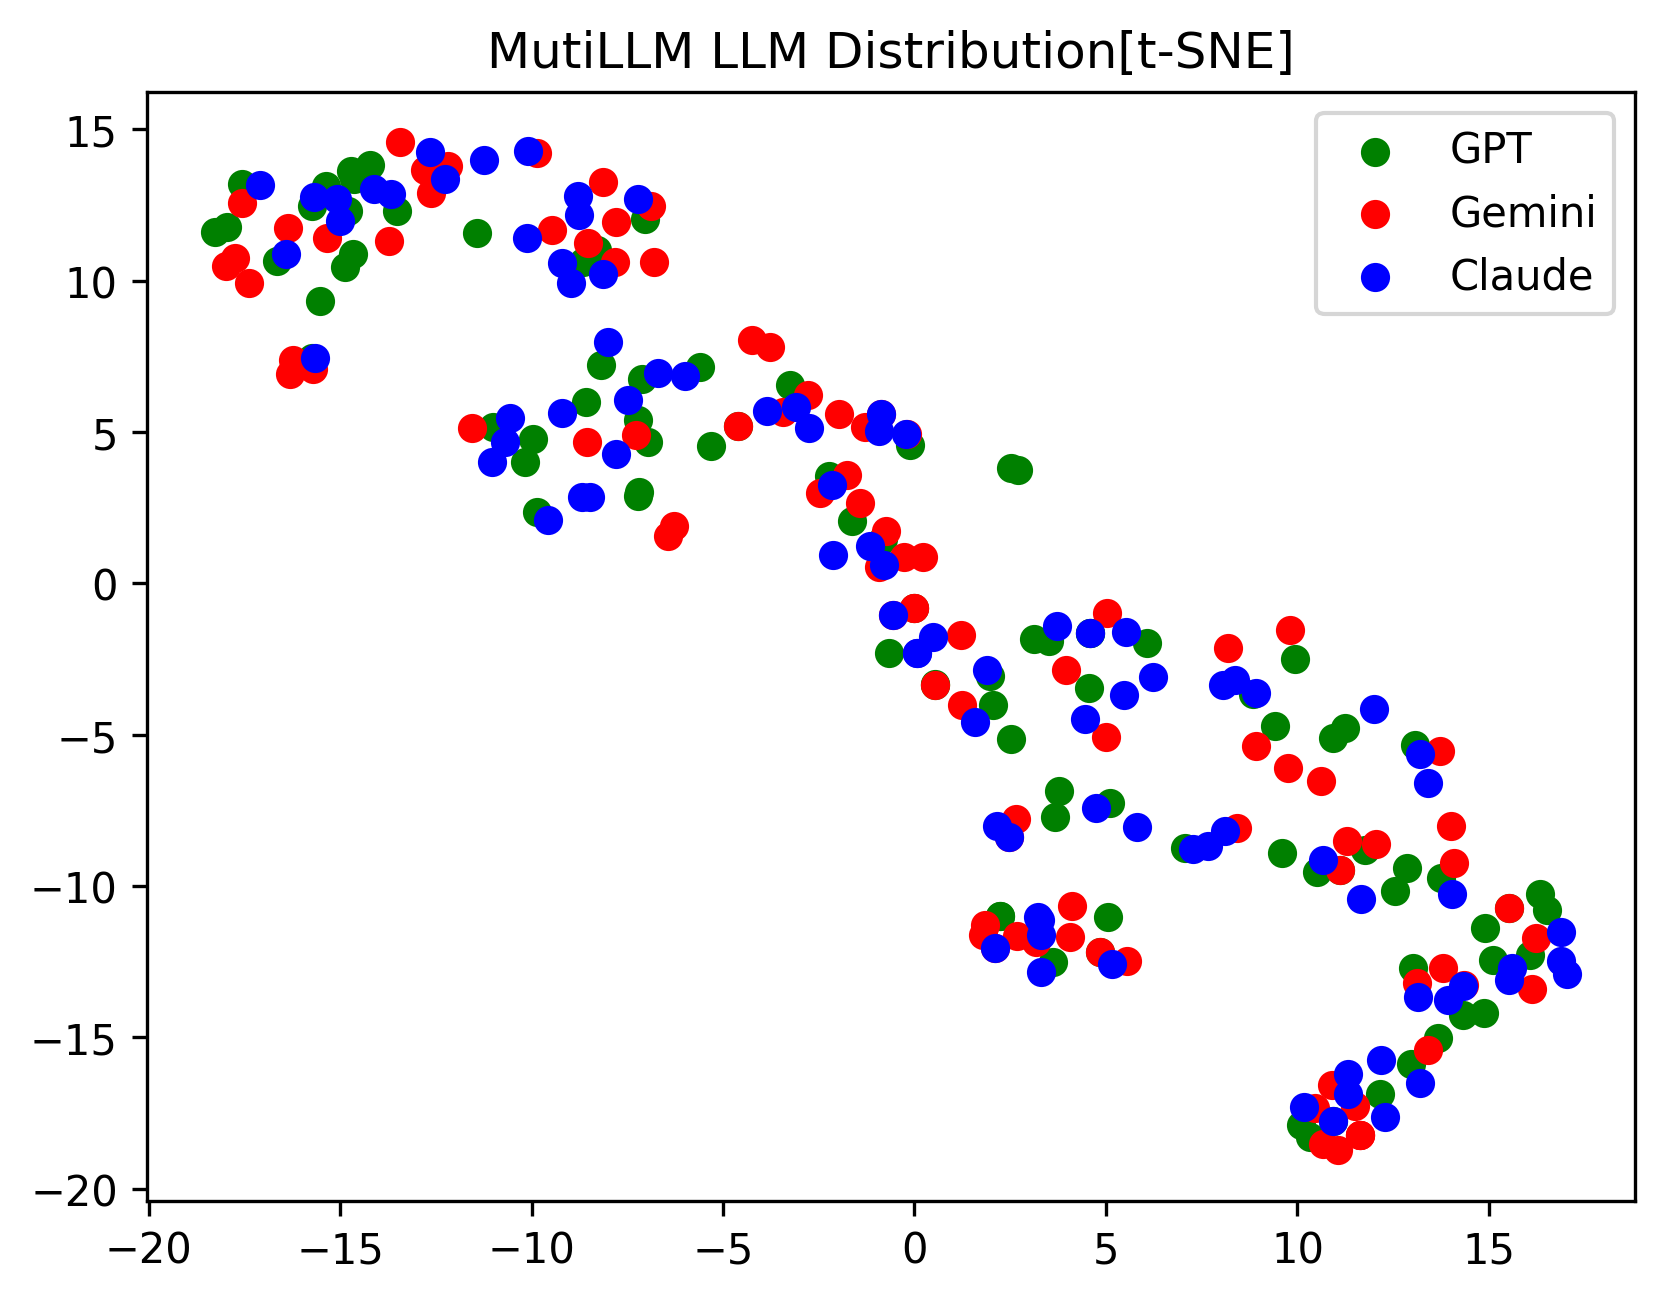

In [28]:
plt.figure()
plt.scatter(x_tsne[np.where(z==1),0], x_tsne[np.where(z==1), 1], color='g', label = "GPT")
plt.scatter(x_tsne[np.where(z==2),0], x_tsne[np.where(z==2), 1], color='r', label = "Gemini")
plt.scatter(x_tsne[np.where(z==3),0], x_tsne[np.where(z==3), 1], color='b', label = "Claude")
plt.title('MutiLLM LLM Distribution[t-SNE]')
plt.legend()

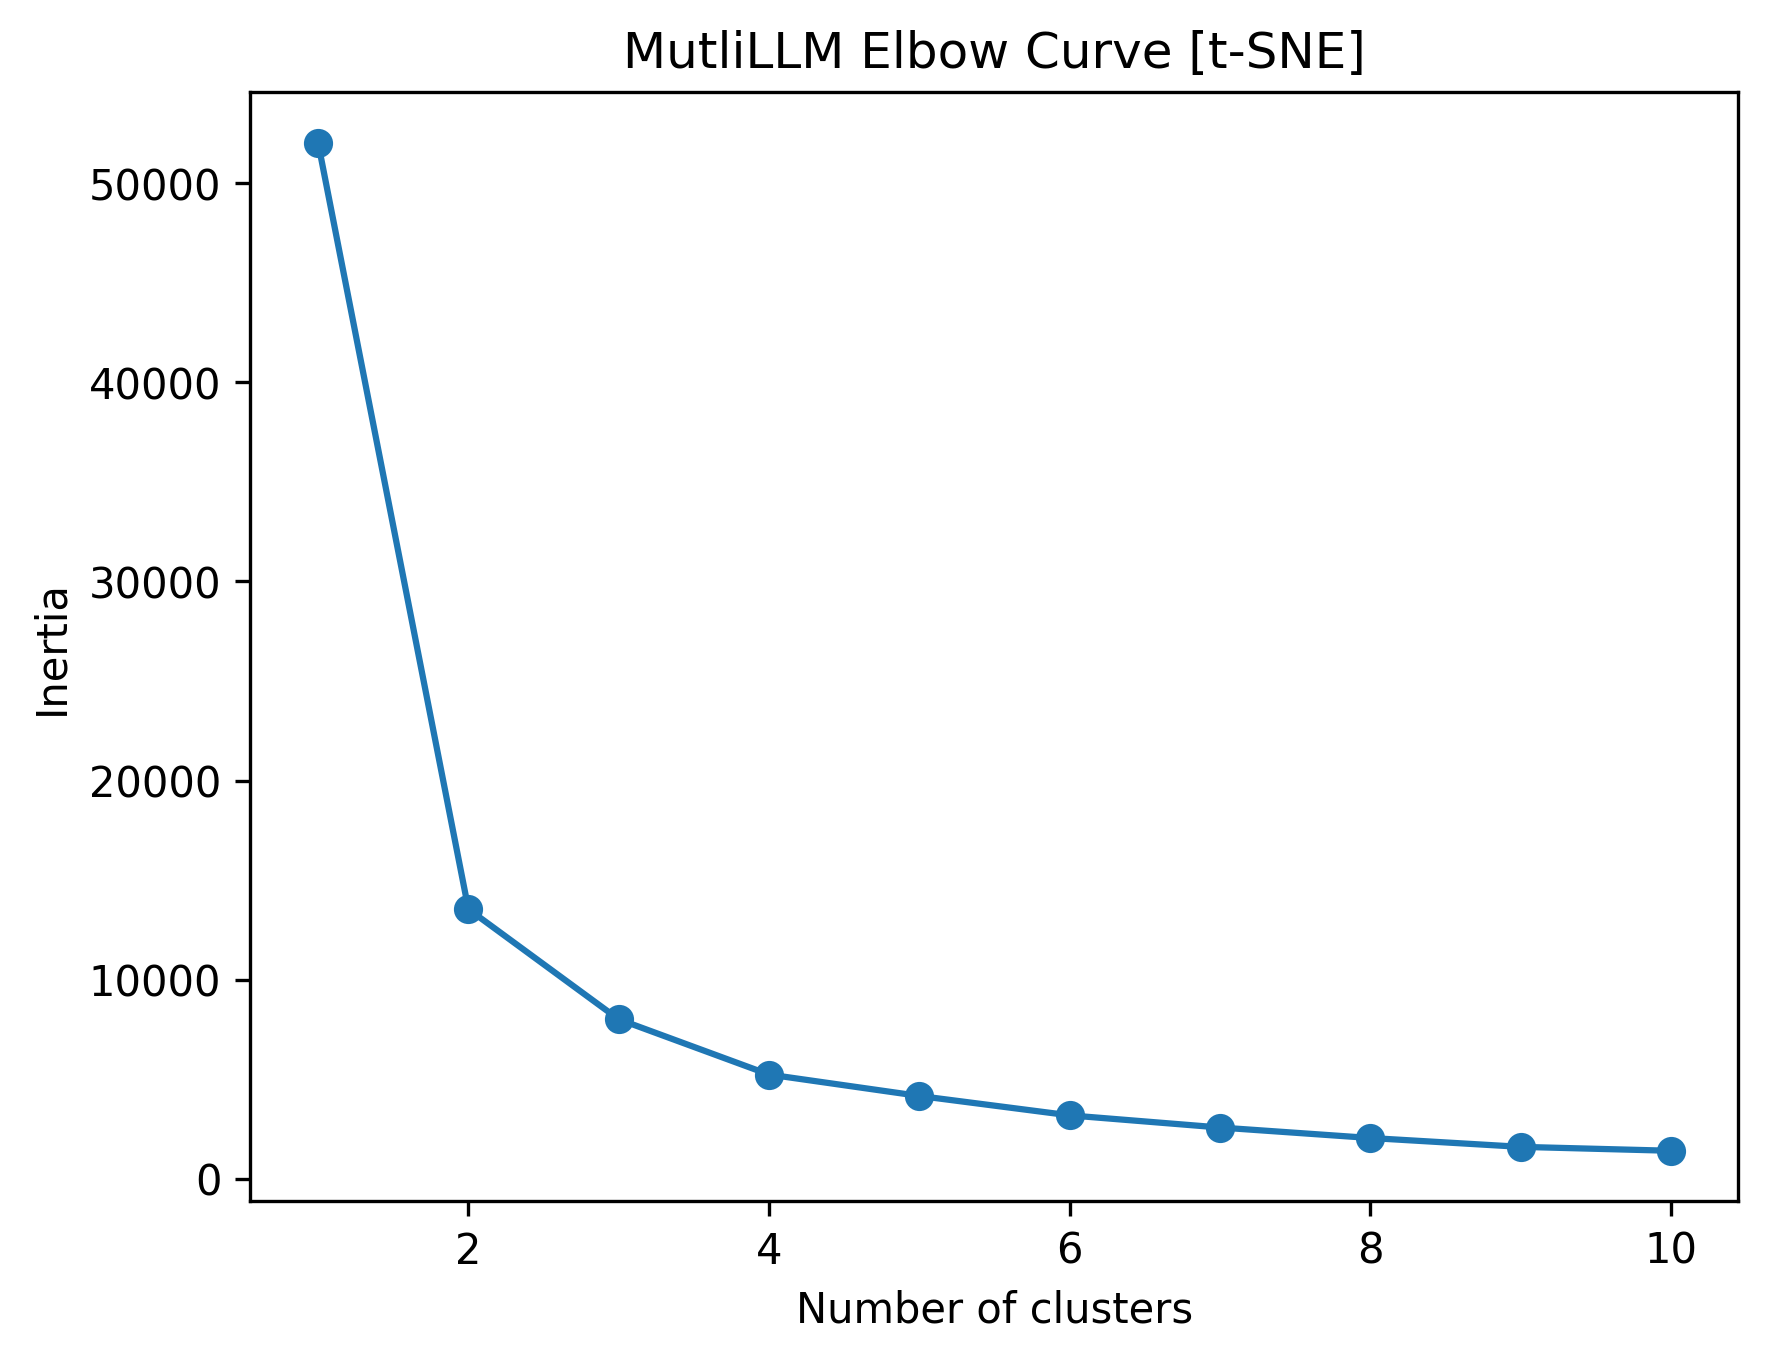

In [29]:
clust_data = tuple(map(tuple, x_tsne))
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('MutliLLM Elbow Curve [t-SNE]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Text(0, 0.5, 'Dim 2')

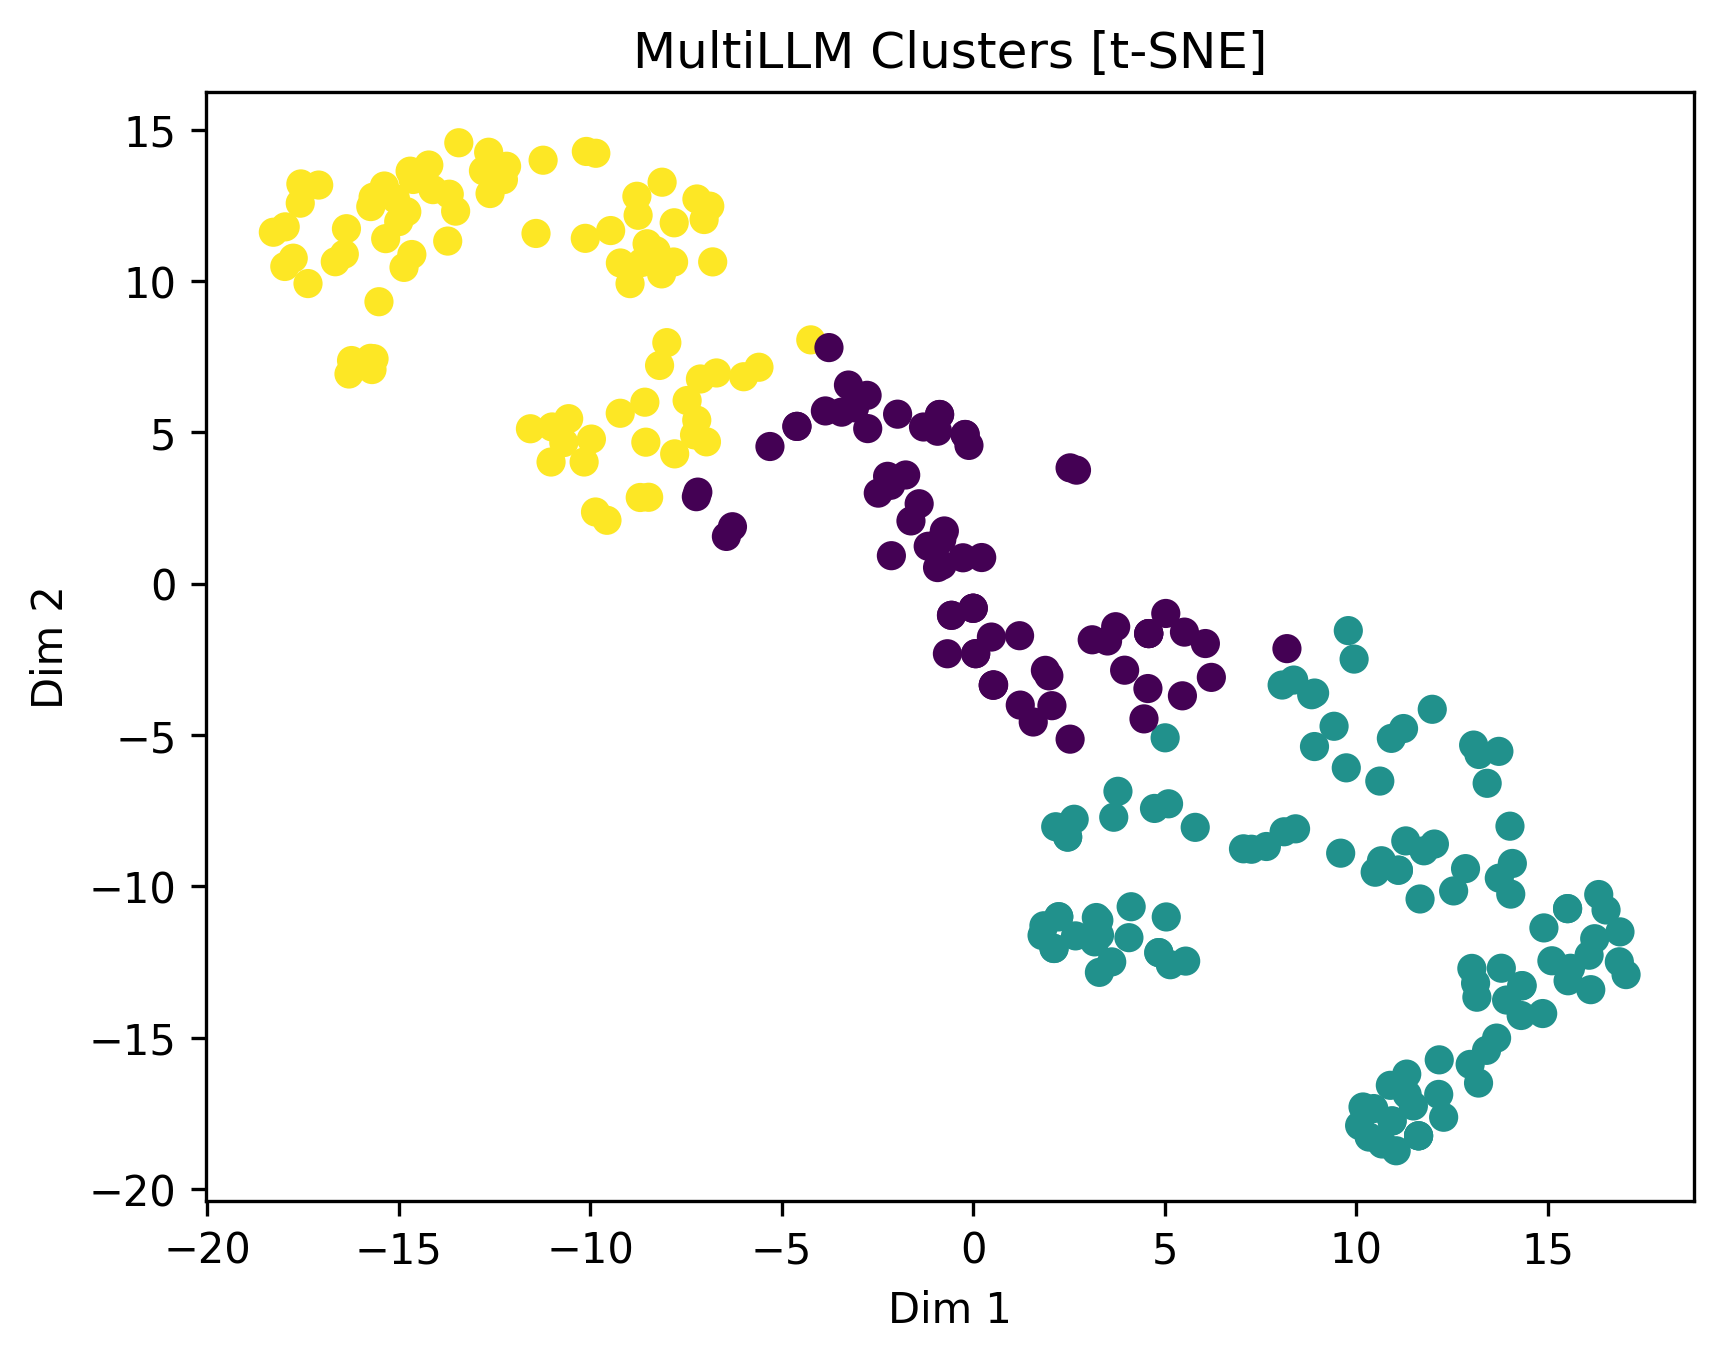

In [30]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data)

#Plotting classified data
plt.scatter(x_tsne[np.where(y>0),0], x_tsne[np.where(y>0), 1], c=kmeans.labels_)
plt.title('MultiLLM Clusters [t-SNE]')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

In [25]:
# Create a DataFrame to organize the cluster assignments and the labels (CM, QM, EM)
cluster_data = pd.DataFrame({'Cluster': kmeans.labels_, 'Label': y})

# Use the 'groupby' function to count how many of each label are in each cluster
cluster_summary = cluster_data.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

# Display the summary
print(cluster_summary)

Label     1   2   3
Cluster            
0        25  16  31
1        28  51  33
2        37  23  26


In [26]:
# Create a DataFrame to organize the cluster assignments and the LLM (GPT, Gemini, Claude)
cluster_data = pd.DataFrame({'Cluster': kmeans.labels_, 'Label': z})

# Use the 'groupby' function to count how many of each label are in each cluster
cluster_summary = cluster_data.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

# Display the summary
print(cluster_summary)

Label     1   2   3
Cluster            
0        24  26  22
1        37  38  37
2        29  26  31
